In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats
from ram.utils.time_funcs import convert_date_array

In [11]:
print(RunManager.get_run_names('LongPeadStrategy'))

         Run                                        Description
0   run_0018                               sector 30 new params
1   run_0020                       sector 30 with aasims params
2   run_0021  Sector 30, lowered price to 5, though no filte...
3   run_0022                     test run with predictive model
4   run_0023                            test run with more data
5   run_0024                         more data updated features
6   run_0025     same as run 0024 but with ExtraTressClassifier
7   run_0026          same as above but with LogisticRegression
8   run_0027  Voting with Logistic Classifier, Random Forest...
9   run_0028                                    AAdaBoost model
10  run_0029                                           AdaBoost
11  run_0030                                           adaboost
12  run_0031  bagging for logistic, voting method same as ru...
13  run_0036                                              ridge
14  run_0037                        remo

## Analysis of a single run

In [19]:
rm1 = RunManager('LongPeadStrategy', 'run_0066', test_periods=0)
rm1.import_return_frame()
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,logistic_spread,0.1,4,0.667586,0.150331,-999.0
1,logistic_spread,0.5,4,0.665786,0.150343,-999.0
2,logistic_spread,1,4,0.660489,0.150364,-999.0
3,model_drop,0,12,0.664620,0.150346,-999.0
4,response_days,"[2, 4, 6]",12,0.664620,0.150346,-999.0
5,response_thresh,0.45,12,0.664620,0.150346,-999.0
6,training_qtrs,-99,3,0.807427,0.181862,-999.0
7,training_qtrs,1,3,0.265224,0.058846,-999.0
8,training_qtrs,12,3,0.799218,0.181346,-999.0
9,training_qtrs,6,3,0.786612,0.179330,-999.0


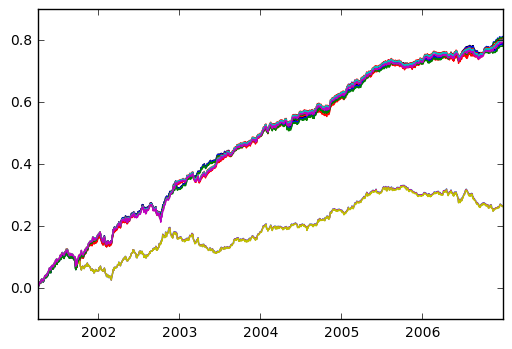

In [20]:
plt.figure()
plt.plot(rm1.returns.cumsum())
plt.show()

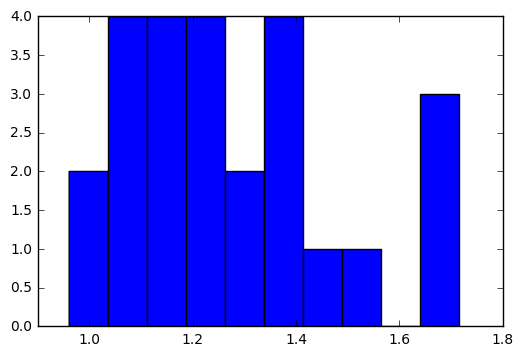

In [5]:
# Sharpe Ratios
plt.figure()
plt.hist(rm1.returns.mean() * 252 / rm1.returns.std() / np.sqrt(252))
plt.show()

## Compare runs

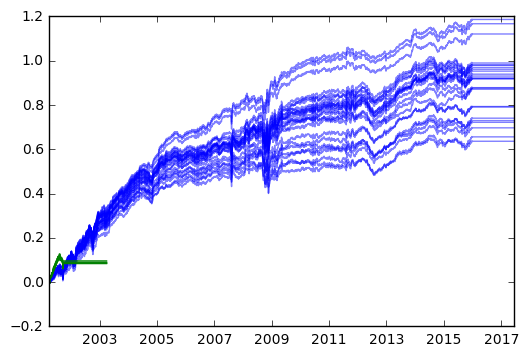

In [14]:
runs = ['run_0062', 'run_0066']

colors = ['b', 'g']

for c, run in zip(colors, runs):
    rm1 = RunManager('LongPeadStrategy', run, 2000, test_periods=6)
    rm1.import_return_frame()
    plt.plot(rm1.returns.cumsum(), c, alpha=.5)

plt.show()